# Customer Service Discord Bot Using SambaNova with Agentic RAG

You can also check this cookbook in colab [here](https://colab.research.google.com/drive/1j7U-QN4MLckJoaUoprODGtD-jjPIQkLc?usp=sharing)

⭐ <i>Star us on [*Github*](https://github.com/camel-ai/camel), join our [*Discord*](https://discord.camel-ai.org) or follow our [*X*](https://x.com/camelaiorg)

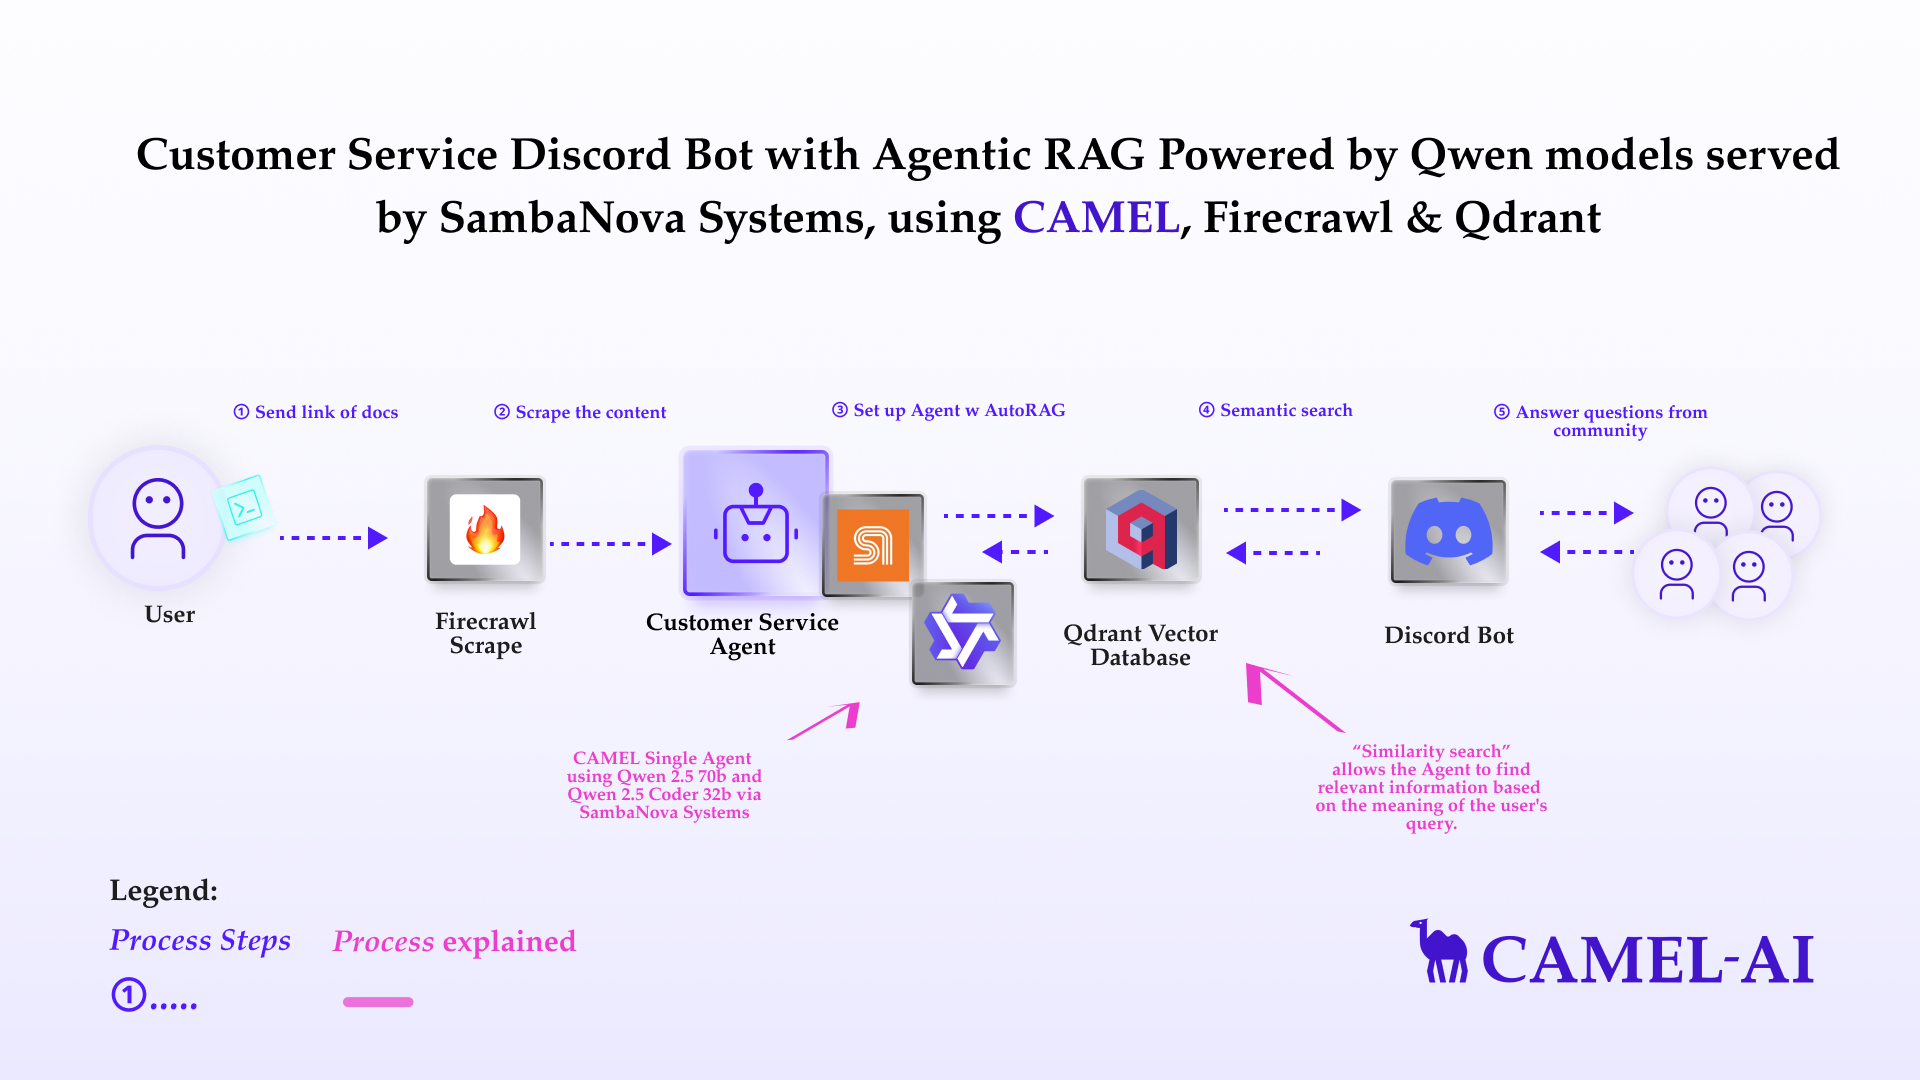

## Installation and Setup
First, install the CAMEL package with all its dependencies

In [ ]:
!pip install "camel-ai[all]==0.2.16"
!pip install starlette
!pip install nest_asyncio

Next, set up your API keys for Firecrawl and SambaNova

If you don't have a FireCrawl API key, you can obtain one by following these steps:

1. Visit the FireCrawl API Key page https://www.firecrawl.dev/app/api-keys

2. Log in or sign up for a FireCrawl account.

3. Navigate to the 'API Keys' section.

4. Click on 'Create API Key' button to generate a new API key.

For more details, you can also check the Firecrawl documentation: https://docs.firecrawl.dev/api-reference/introduction

In [2]:
import os
from getpass import getpass


firecrawl_api_key = getpass('Enter your API key: ')
os.environ["FIRECRAWL_API_KEY"] = firecrawl_api_key

Enter your API key: ··········


If you don't have a SambaNova Cloud API key, you can obtain one by following these steps:

1. Visit the SambaNova Cloud page https://cloud.sambanova.ai/apis

2. Log in or sign up for a SambaNova account.

3. Navigate to the 'API Keys' section.

4. Click on 'Create API Key' button to generate a new API key.

For more details, you can also check the SambaNova documentation: https://community.sambanova.ai/c/docs/

In [3]:
import os
from getpass import getpass

samba_api_key = getpass('Enter your API key: ')
os.environ["SAMBA_API_KEY"] = samba_api_key

Enter your API key: ··········


Alternatively, if running on Colab, you could save your API keys and tokens as **Colab Secrets**, and use them across notebooks.

To do so, **comment out** the above **manual** API key prompt code block(s), and **uncomment** the following codeblock.

⚠️ Don't forget granting access to the API key you would be using to the current notebook.

In [ ]:
# import os
# from google.colab import userdata

# os.environ["FIRECRAWL_API_KEY"] = userdata.get("FIRECRAWL_API_KEY")
# os.environ["SAMBA_API_KEY"] = userdata.get("SAMBA_API_KEY")

## Knowledge Crawling and Storage

Use Firecrawl to crawl a website and get markdown content as external knowledge:



In [5]:
import os
from camel.loaders import Firecrawl

firecrawl = Firecrawl()

knowledge = firecrawl.crawl(
    url="https://sambanova.ai/blog/qwen-2.5-32b-coder-available-on-sambanova-cloud"
)["data"][0]["markdown"]

Store the content in a markdown file:

In [6]:
os.makedirs('local_data', exist_ok=True)

with open('local_data/sambanova_announcement.md', 'w') as file:
     file.write(knowledge)

## Basic Agent Setup

Qwen is large language model developed by Alibaba. It is trained on a massive dataset of text and code and can generate text, translate languages, write different kinds of creative content, and answer your questions in an informative way.

Use Qwen models with SambaNova Cloud to set up CAMEL agent:

In [16]:
from camel.configs import SambaCloudAPIConfig
from camel.models import ModelFactory
from camel.types import ModelPlatformType, ModelType
from camel.agents import ChatAgent
from camel.messages import BaseMessage

#### Set up Agent using Qwen2.5-Coder-32B-Instruct #####
qwen_model = ModelFactory.create(
    model_platform=ModelPlatformType.SAMBA,
    model_type="Qwen2.5-Coder-32B-Instruct",
    model_config_dict=SambaCloudAPIConfig(max_tokens=4000).as_dict(),
)

# ##### Set up Agent using Qwen2.5-72B-Instruct #####
# qwen_model = ModelFactory.create(
#     model_platform=ModelPlatformType.SAMBA,
#     model_type="Qwen2.5-72B-Instruct",
#     model_config_dict=SambaCloudAPIConfig(max_tokens=4000).as_dict(),
# )

chat_agent = ChatAgent(
    system_message="You're a helpful assistant",
    message_window_size=20,
    model=qwen_model
)

Insert the external knowledge to Agent

In [17]:
knowledge_message = BaseMessage.make_user_message(
    role_name="User", content=f"Based on the following knowledge: {knowledge}"
)
chat_agent.update_memory(knowledge_message, "user")

## Basic Chatbot Setup

Let's set up the basic Chatbot with CAMEL Agent and ask some questions!

Example question you can ask:

*How SambaNova Cloud supports Qwen 2.5 Coder and how fast it is?*

In [18]:
print("Start chatting! Type 'exit' to end the conversation.")
while True:
    user_input = input("User: ")

    if user_input.lower() == "exit":
        print("Ending conversation.")
        break

    assistant_response = chat_agent.step(user_input)
    print(f"Assistant: {assistant_response.msgs[0].content}")

Start chatting! Type 'exit' to end the conversation.
User: How SambaNova Cloud supports Qwen 2.5 Coder and how fast it is?
Assistant: SambaNova Cloud supports Qwen 2.5 Coder by providing a platform that leverages the efficiency and performance of SambaNova's RDU (Reconfigurable Dataflow Unit) chips. These chips are designed to handle the most demanding AI workloads, including generative AI models like Qwen 2.5 Coder, with superior performance compared to traditional GPUs.

### Key Points:

1. **Performance**: 
   - **5X Faster than GPUs**: The Qwen 2.5 Coder model runs over 5X faster on SambaNova Cloud compared to leading GPU providers. This speedup is due to the optimized architecture of the RDU chips, which are specifically designed for AI workloads.
   - **Efficient Inference**: The RDU chips provide fast inference speeds, which are crucial for real-time applications and seamless user experiences.

2. **Integration**:
   - **Ease of Use**: SambaNova Cloud makes it easy for developer

## Basic Discord Bot Integration

To build a discord bot, a discord bot token is necessary.

If you don't have a bot token, you can obtain one by following these steps:

1. Go to the Discord Developer Portal:https://discord.com/developers/applications

2. Log in with your Discord account, or create an account if you don't have one

3. Click on 'New Application' to create a new bot.

4. Give your application a name and click 'Create'.

5. Navigate to the 'Bot' tab on the left sidebar and click 'Add Bot'.

6. Once the bot is created, you will find a 'Token' section. Click 'Reset Token' to generate a new token.

7. Copy the generated token securely.

To invite the bot:

1. Navigate to the 'OAuth2' tab, then to 'URL Generator'.

2. Under 'Scopes', select 'bot'.

3. Under 'Bot Permissions', select the permissions your bot will need (e.g., 'Send Messages', 'Read Messages' for our bot use)

4. Copy the generated URL and paste it into your browser to invite the bot to your server.

To grant the bot permissions:

1. Navigate to the 'Bot' tab

2. Under 'Privileged Gateway Intents', check 'Server Members Intent' and 'Message Content Intent'.

For more details, you can also check the official Discord bot documentation: https://discord.com/developers/docs/intro


In [24]:
import os
from getpass import getpass

discord_bot_token = getpass('Enter your Discord bot token: ')
os.environ["DISCORD_BOT_TOKEN"] = discord_bot_token

Enter your Discord bot token: ··········


In [ ]:
# import os
# from google.colab import userdata

# os.environ["DISCORD_BOT_TOKEN"] = userdata.get("DISCORD_BOT_TOKEN")

This code cell sets up a simple Discord bot using the DiscordApp class from the camel.bots library. The bot listens for messages in any channel it has access to and provides a response based on the input message.

In [21]:
from camel.bots import DiscordApp
import nest_asyncio
import discord

nest_asyncio.apply()
discord_bot = DiscordApp(token=discord_bot_token)

@discord_bot.client.event
async def on_message(message: discord.Message):
    if message.author == discord_bot.client.user:
        return

    if message.type != discord.MessageType.default:
        return

    if message.author.bot:
        return

    user_input = message.content
    chat_agent.reset()
    chat_agent.update_memory(knowledge_message, "user")
    assistant_response = chat_agent.step(user_input)

    response_content = assistant_response.msgs[0].content

    if len(response_content) > 2000: # discord message length limit
        for chunk in [response_content[i:i+2000] for i in range(0, len(response_content), 2000)]:
            await message.channel.send(chunk)
    else:
        await message.channel.send(response_content)

discord_bot.run()

2024-12-10 16:16:51 INFO     discord.client logging in using static token
2024-12-10 16:16:51 INFO     discord.client logging in using static token
INFO:discord.client:logging in using static token
2024-12-10 16:16:52 INFO     discord.gateway Shard ID None has connected to Gateway (Session ID: 5b6a3257cd69b0e64ea74f15e0abc8ca).
2024-12-10 16:16:52 INFO     discord.gateway Shard ID None has connected to Gateway (Session ID: 5b6a3257cd69b0e64ea74f15e0abc8ca).
INFO:discord.gateway:Shard ID None has connected to Gateway (Session ID: 5b6a3257cd69b0e64ea74f15e0abc8ca).


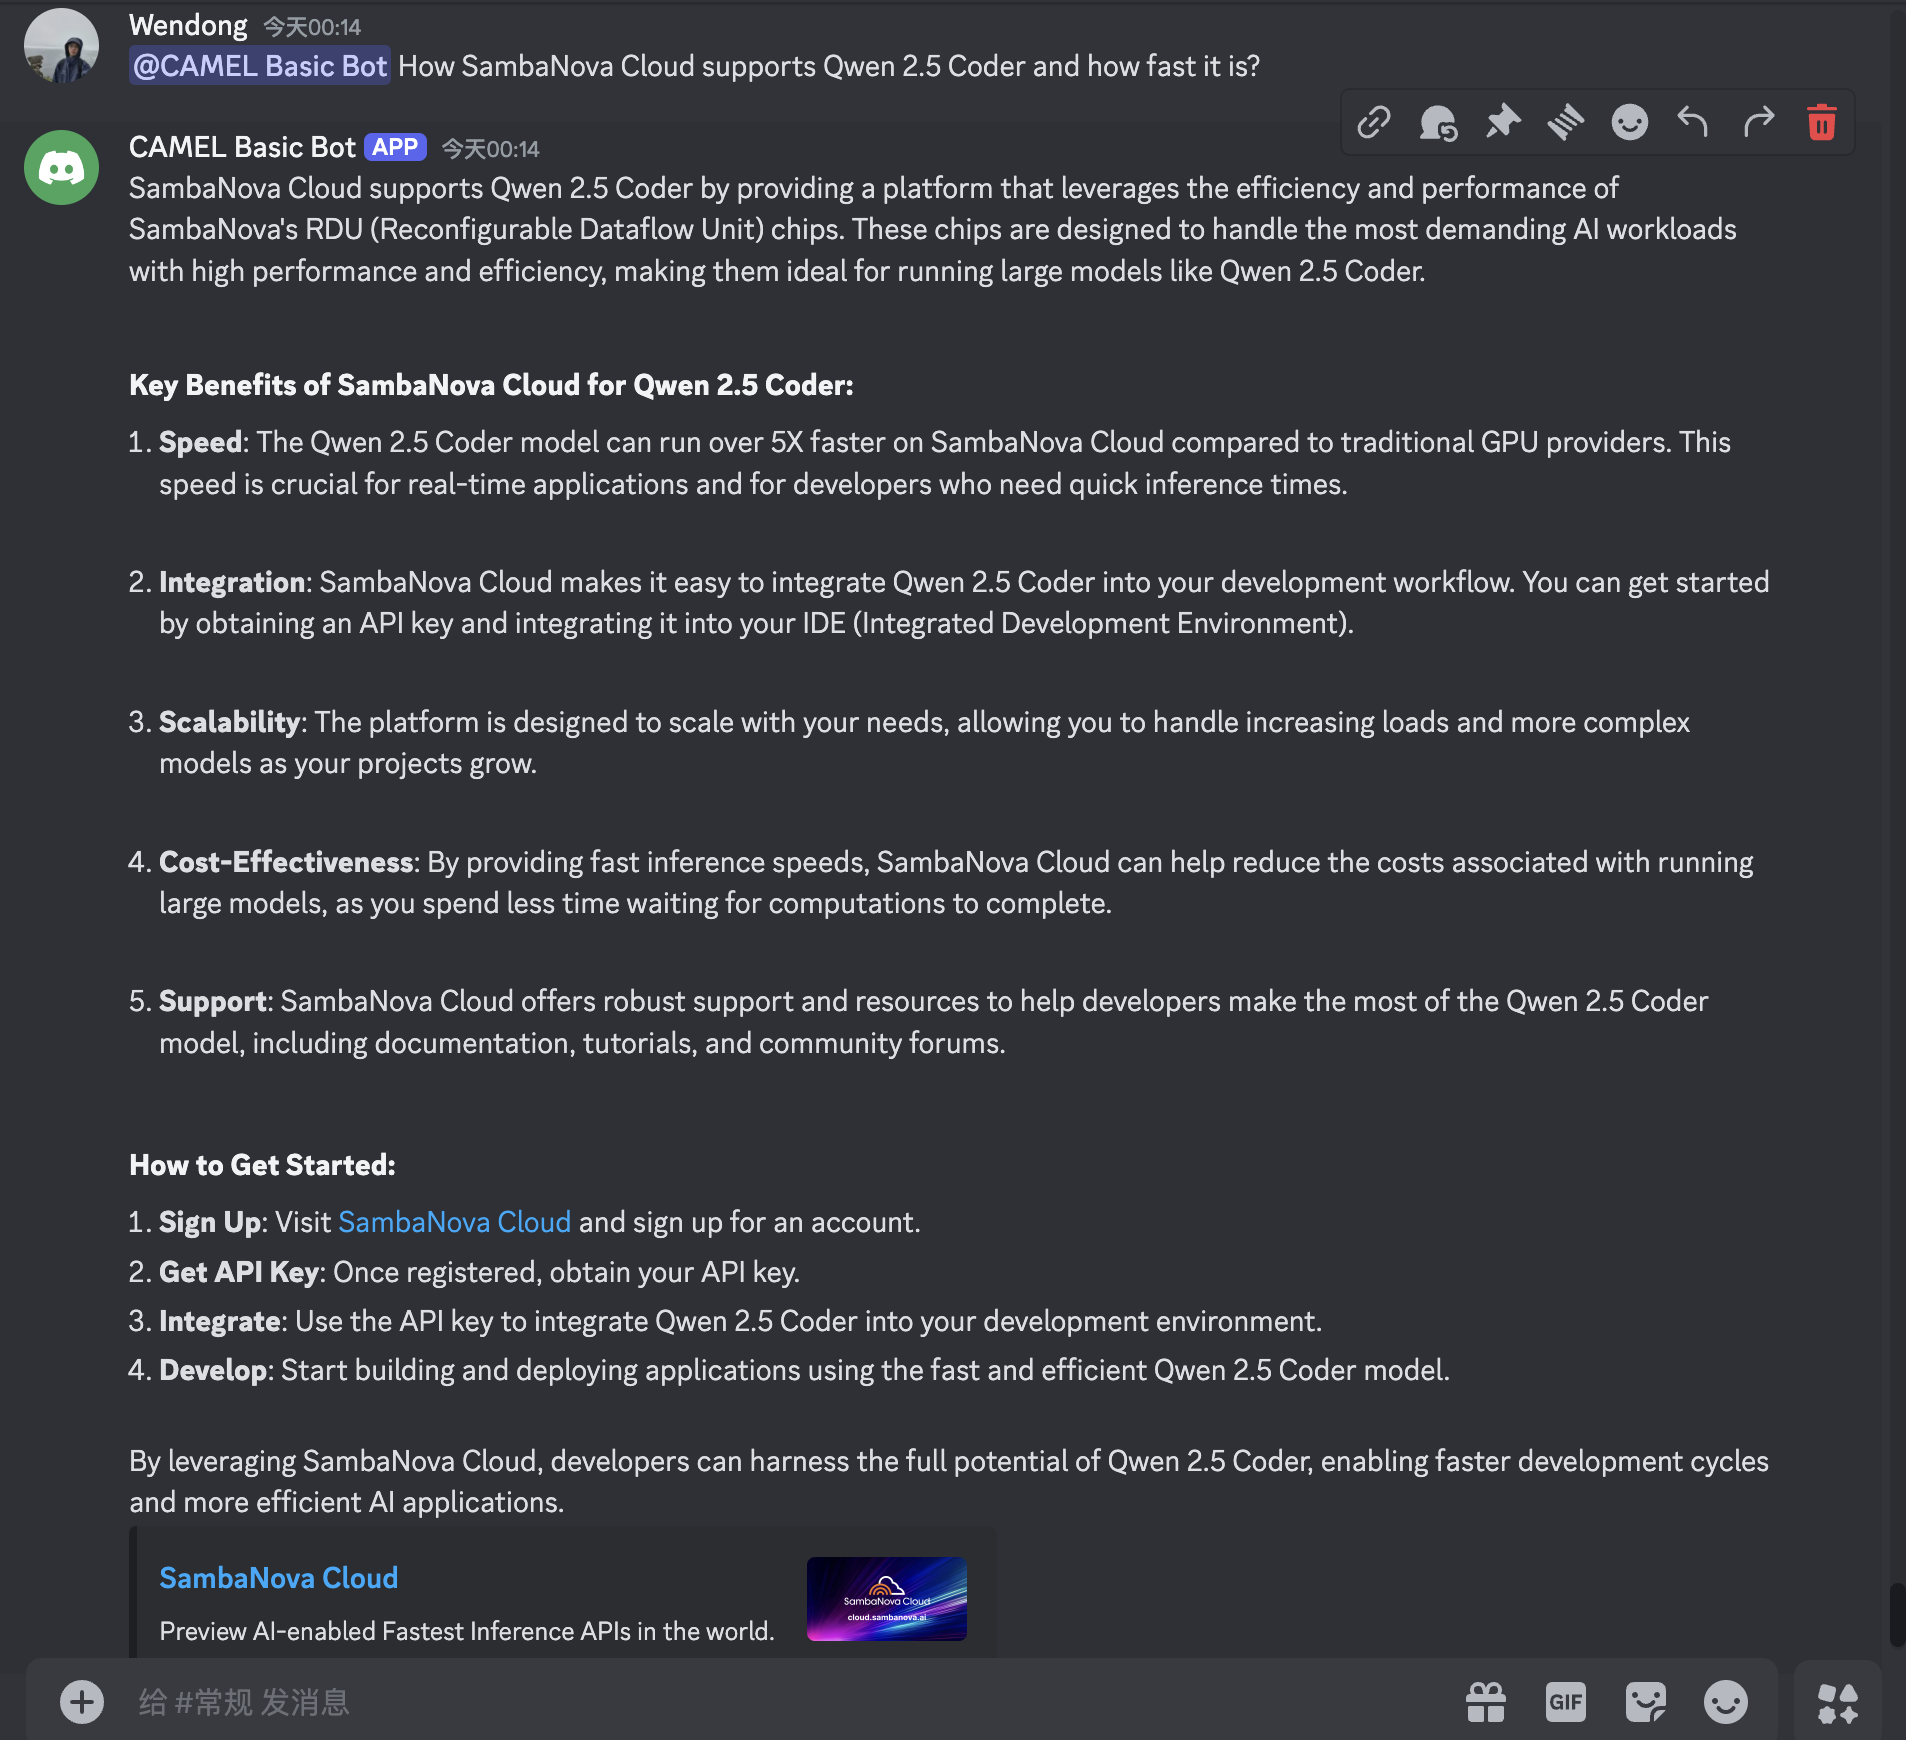

## Integrating Qdrant for More Files to build a more powerful Discord bot

Qdrant is a vector similarity search engine and vector database. It is designed to perform fast and efficient similarity searches on large datasets of vectors. This enables the chatbot to access and utilize external information to provide more comprehensive and accurate responses. By storing knowledge as vectors, Qdrant enables efficient semantic search, allowing the chatbot to find relevant information based on the meaning of the user's query.

In this section, we will add more data source, including camel's example code regarding how to use SambaNova Cloud, then ask more complex questions.

Set up an embedding model and retriever for Qdrant:
You can use Tesla T4 Google Colab instance for running open-source embedding models with RAG functionality for bots, feel free switch to other embedding models supported by CAMEL.

In [ ]:
from camel.embeddings import SentenceTransformerEncoder # CAMEL also support other embedding models
from camel.types import EmbeddingModelType

sentence_encoder = SentenceTransformerEncoder(model_name='intfloat/e5-large-v2')

Set up the AutoRetriever for retrieving relevant information from a storage system.

In [30]:
from camel.retrievers import AutoRetriever
from camel.types import StorageType

assistant_sys_msg = """You are a helpful assistant to answer question,
         I will give you the Original Query and Retrieved Context,
        answer the Original Query based on the Retrieved Context,
        if you can't answer the question just say I don't know.
        Just give the answer to me directly, no more other words needed.
        """
auto_retriever = AutoRetriever(
              vector_storage_local_path="local_data2/",
              storage_type=StorageType.QDRANT,
              embedding_model=sentence_encoder
            )
chat_agent_with_rag = ChatAgent(system_message=assistant_sys_msg, model=qwen_model)

Use Auto RAG to retrieve first and then answer the user's query using CAMEL `ChatAgent` based on the retrieved info:

In [31]:
from camel.bots import DiscordApp
import nest_asyncio
import discord

nest_asyncio.apply()
discord_q_bot = DiscordApp(token=discord_bot_token)

@discord_q_bot.client.event # triggers when a message is sent in the channel
async def on_message(message: discord.Message):
    if message.author == discord_q_bot.client.user:
        return

    if message.type != discord.MessageType.default:
        return

    if message.author.bot:
        return

    user_input = message.content

    query_and_retrieved_info = auto_retriever.run_vector_retriever(
        query=user_input,
        contents=[
            "local_data/sambanova_announcement.md", # SambaNova's anncouncement
            "https://github.com/camel-ai/camel/blob/master/examples/models/samba_model_example.py", # CAMEL's example code for SambaNova Usage
        ],
        top_k=3,
        return_detailed_info=False,
        similarity_threshold=0.5
    )

    user_msg = str(query_and_retrieved_info)
    assistant_response = chat_agent_with_rag.step(user_msg)
    response_content = assistant_response.msgs[0].content

    if len(response_content) > 2000: # discord message length limit
        for chunk in [response_content[i:i+2000] for i in range(0, len(response_content), 2000)]:
            await message.channel.send(chunk)
    else:
        await message.channel.send(response_content)

discord_q_bot.run()

2024-12-10 16:35:53 INFO     discord.client logging in using static token
2024-12-10 16:35:53 INFO     discord.client logging in using static token
2024-12-10 16:35:53 INFO     discord.client logging in using static token
2024-12-10 16:35:53 INFO     discord.client logging in using static token
2024-12-10 16:35:53 INFO     discord.client logging in using static token
2024-12-10 16:35:53 INFO     discord.client logging in using static token
INFO:discord.client:logging in using static token
2024-12-10 16:35:54 INFO     discord.gateway Shard ID None has connected to Gateway (Session ID: c87148a016d58631bf1aeec331917521).
2024-12-10 16:35:54 INFO     discord.gateway Shard ID None has connected to Gateway (Session ID: c87148a016d58631bf1aeec331917521).
2024-12-10 16:35:54 INFO     discord.gateway Shard ID None has connected to Gateway (Session ID: c87148a016d58631bf1aeec331917521).
2024-12-10 16:35:54 INFO     discord.gateway Shard ID None has connected to Gateway (Session ID: c87148a016d58

Start from the same query as before:

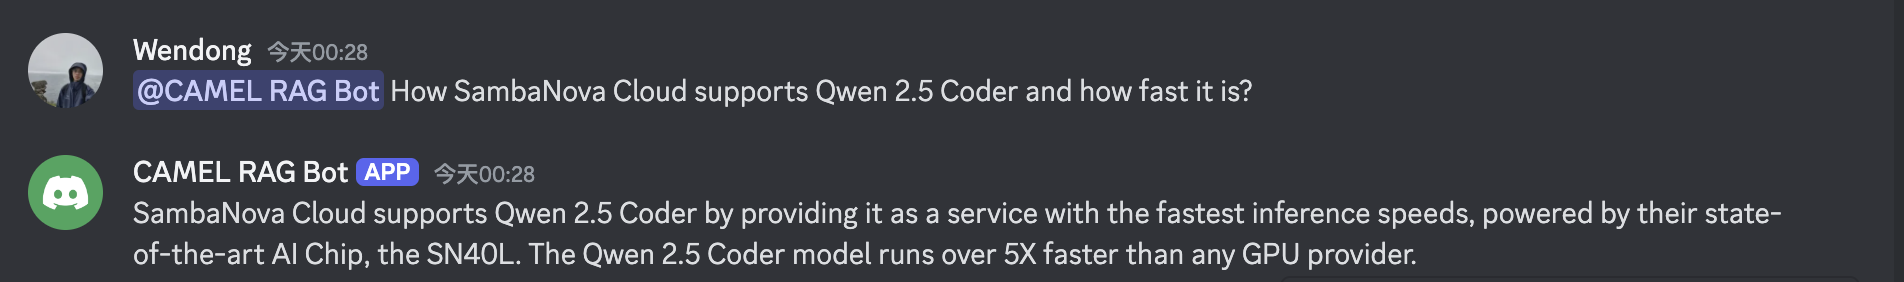

Since we also added CAMEL's example code to the RAG Bot, let's ask some code related question:

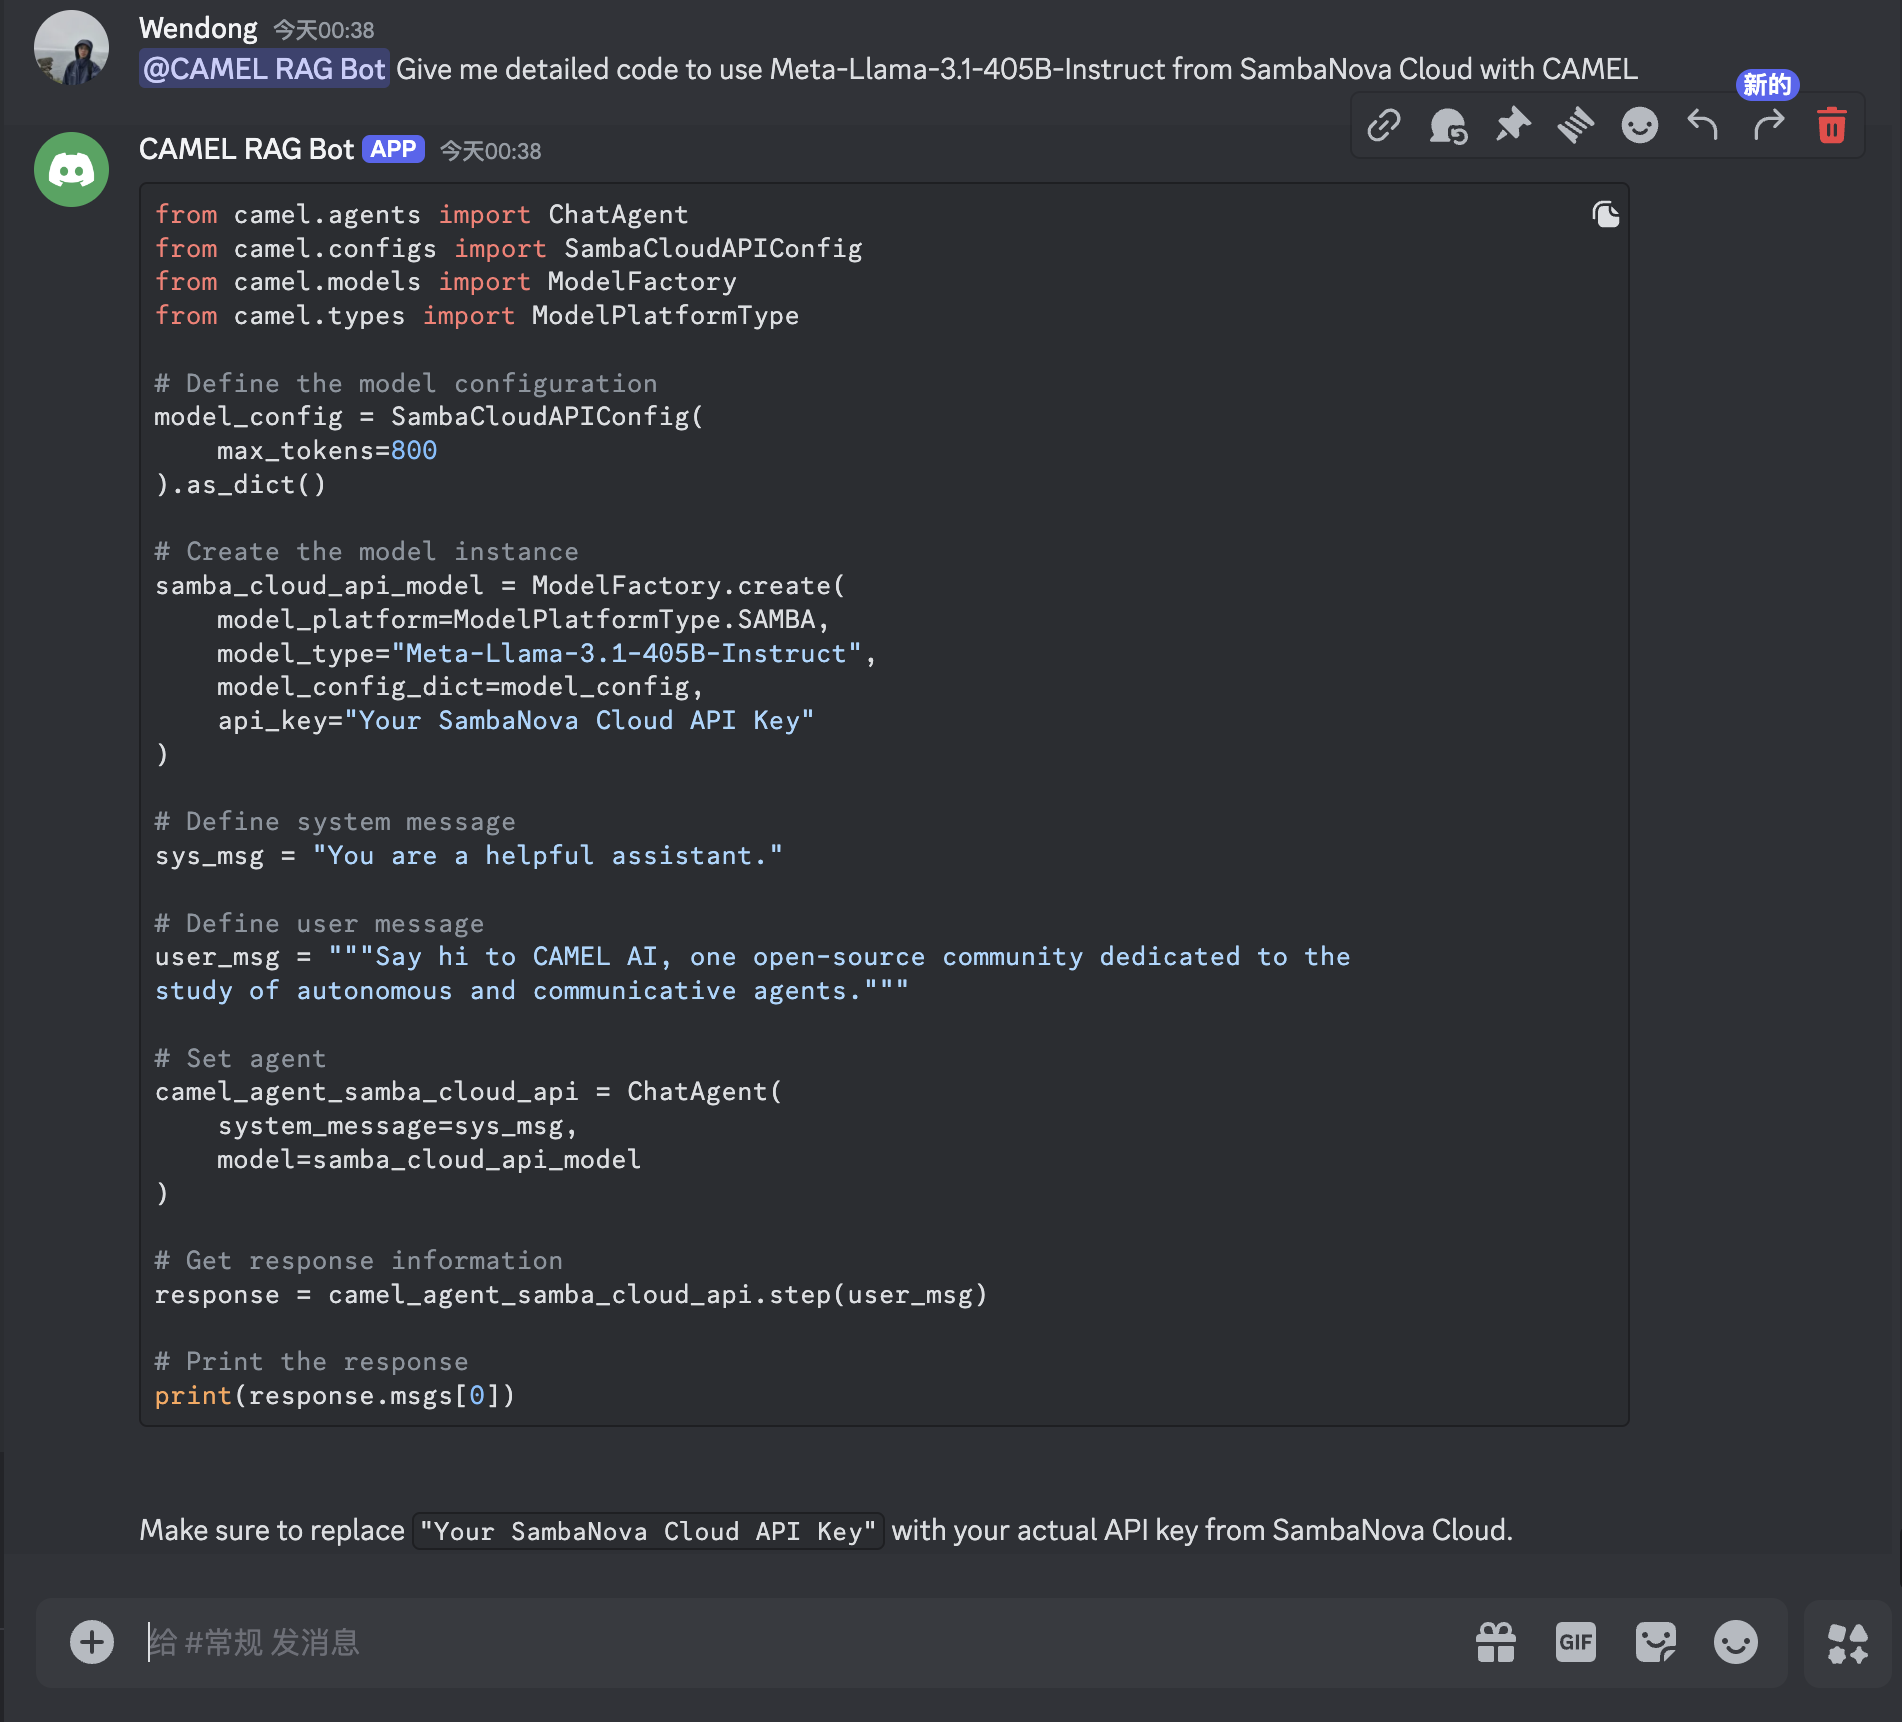

Ask the bot to guide you through setting up `Qwen2.5-Coder-32B-Instruct`. CAMEL's bot, equipped with memory capabilities, can assist effectively by leveraging its ability to recall related information from previous interactions!

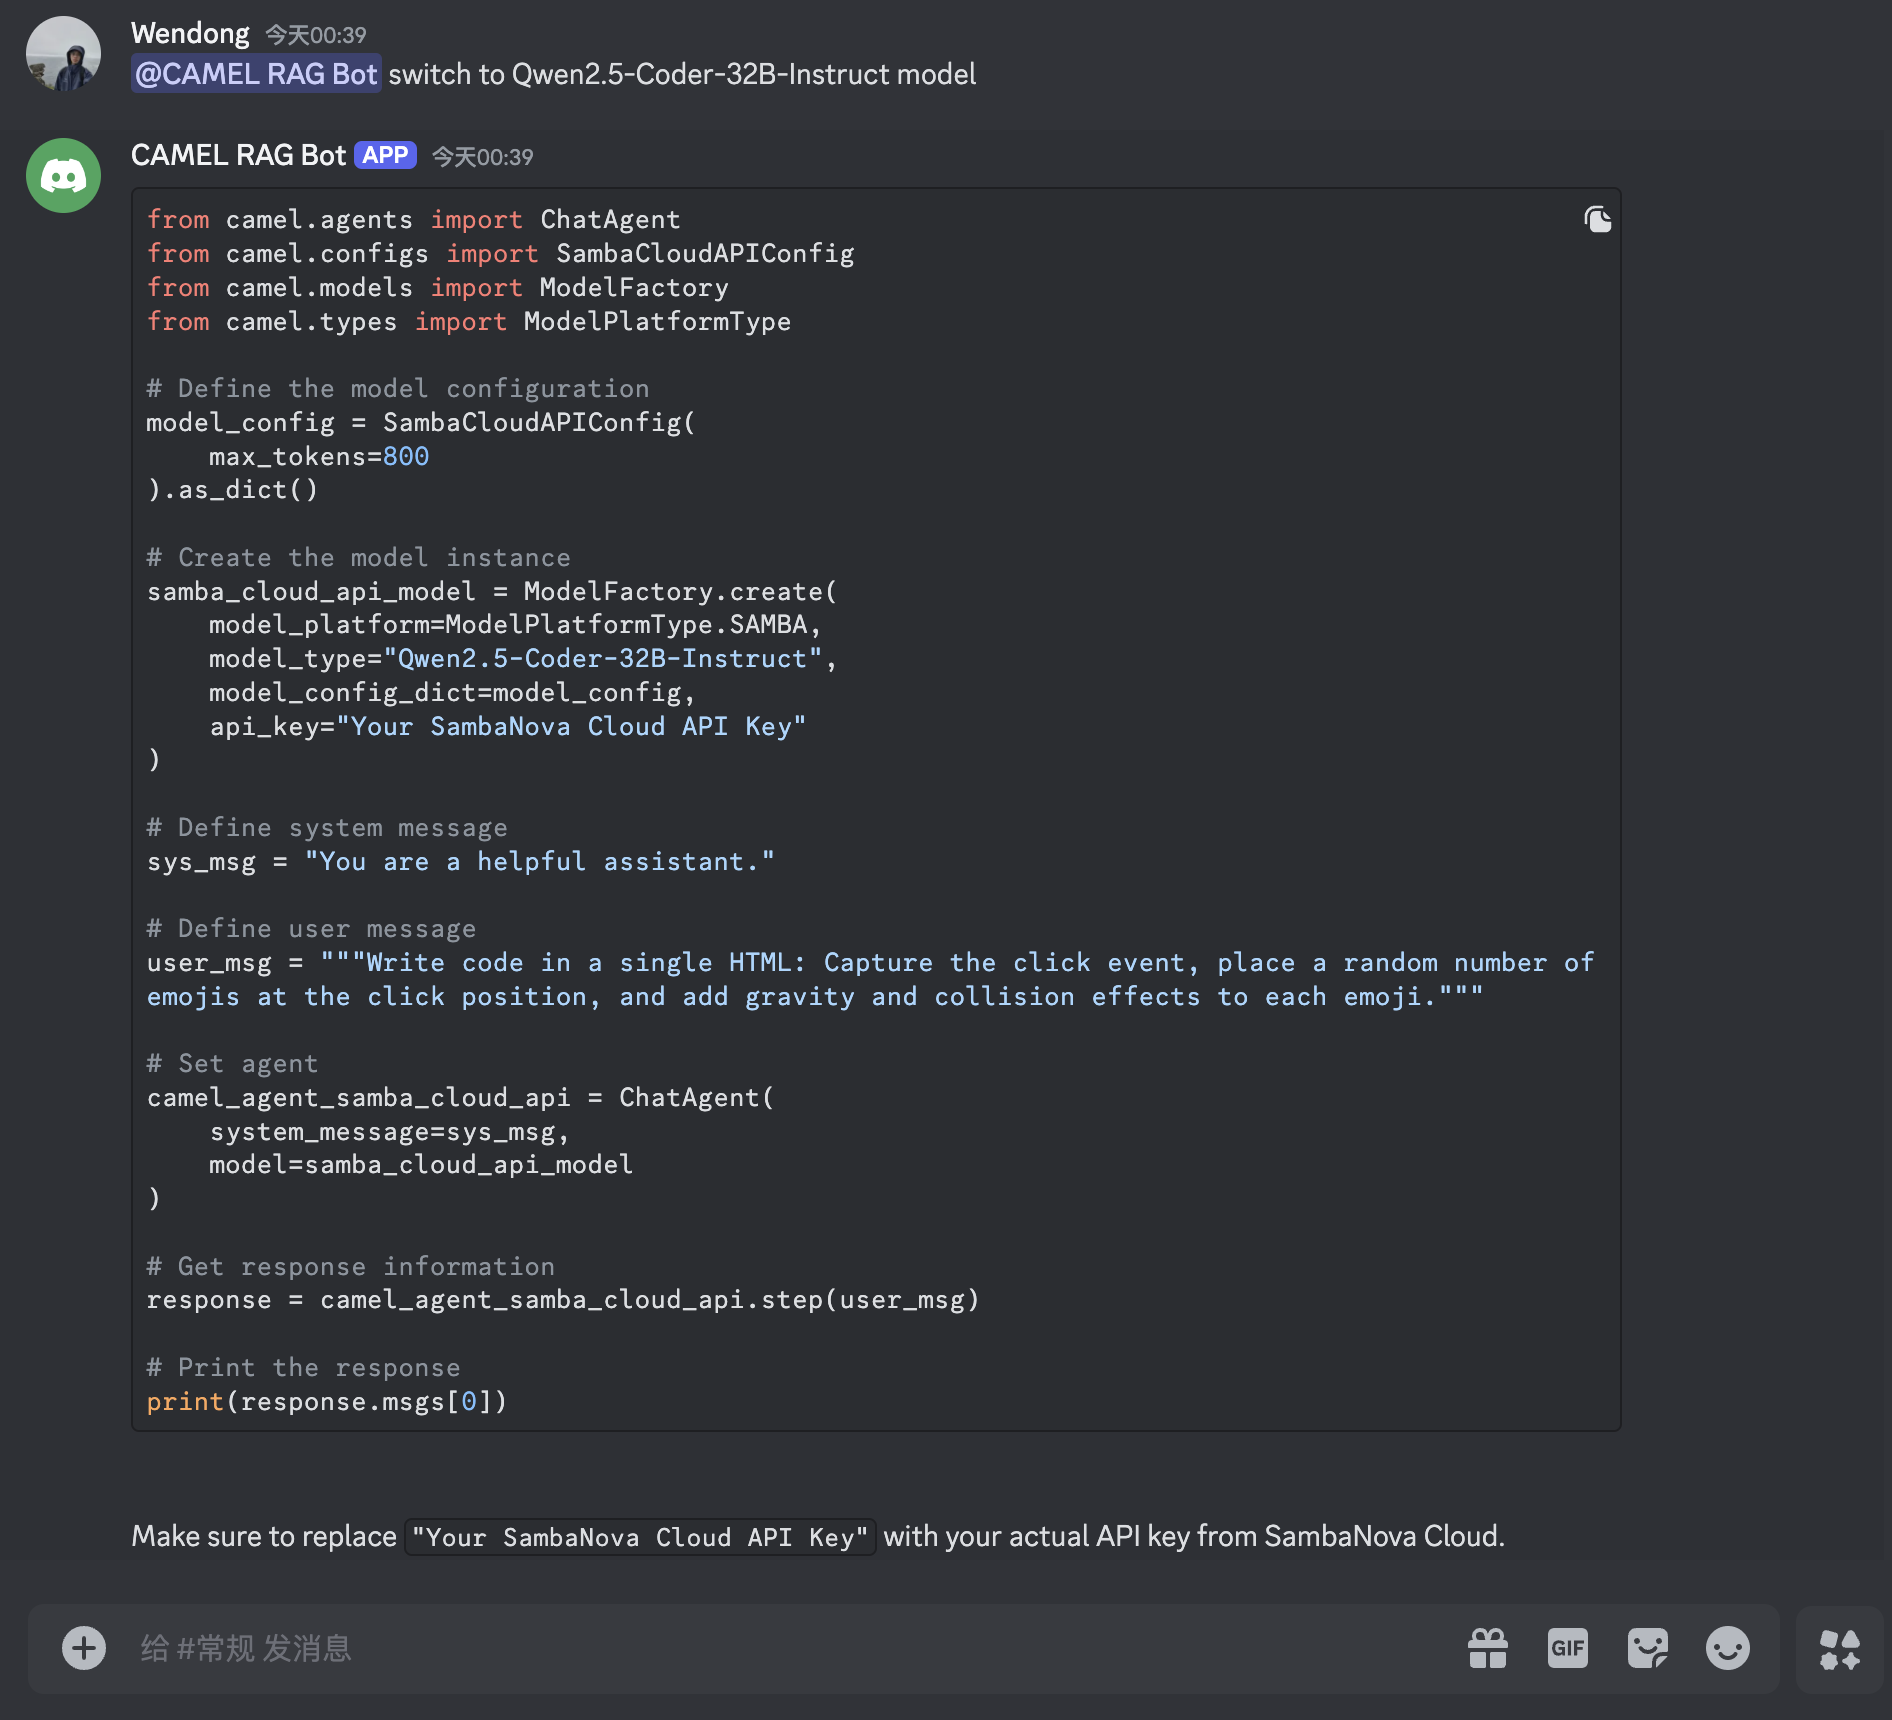

That's everything: Got questions about 🐫 CAMEL-AI? Join us on [Discord](https://discord.camel-ai.org)! Whether you want to share feedback, explore the latest in multi-agent systems, get support, or connect with others on exciting projects, we’d love to have you in the community! 🤝

Check out some of our other work:

1. 🐫 Creating Your First CAMEL Agent [free Colab](https://docs.camel-ai.org/cookbooks/create_your_first_agent.html)

2.  Graph RAG Cookbook [free Colab](https://colab.research.google.com/drive/1uZKQSuu0qW6ukkuSv9TukLB9bVaS1H0U?usp=sharing)

3. 🧑‍⚖️ Create A Hackathon Judge Committee with Workforce [free Colab](https://colab.research.google.com/drive/18ajYUMfwDx3WyrjHow3EvUMpKQDcrLtr?usp=sharing)

4. 🔥 3 ways to ingest data from websites with Firecrawl & CAMEL [free Colab](https://colab.research.google.com/drive/1lOmM3VmgR1hLwDKdeLGFve_75RFW0R9I?usp=sharing)

5. 🦥 Agentic SFT Data Generation with CAMEL and Mistral Models, Fine-Tuned with Unsloth [free Colab](https://colab.research.google.com/drive/1lYgArBw7ARVPSpdwgKLYnp_NEXiNDOd-?usp=sharingg)

Thanks from everyone at 🐫 CAMEL-AI


<div class="align-center">
  <a href="https://www.camel-ai.org/"><img src="https://i.postimg.cc/KzQ5rfBC/button.png"width="150"></a>
  <a href="https://discord.camel-ai.org"><img src="https://i.postimg.cc/L4wPdG9N/join-2.png"  width="150"></a></a>
  
⭐ <i>Star us on <a href="https://github.com/camel-ai/camel">Github</a> </i>, join our [*Discord*](https://discord.camel-ai.org) or follow our [*X*](https://x.com/camelaiorg)  ⭐
</div>
